In [6]:
import os
import cv2
import numpy as np
from imutils import paths
import pickle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from keras.applications import ResNet152
from keras.models import Model
from keras.optimizers.legacy import SGD
import math



In [7]:
# Set your paths and parameters
dataPath = r"/Users/priyankafrancis/Desktop/Dissertation/data"
outputmodel = r"/Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification"
outpulabebinarize = r"/Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoRN152"
epoch = 25
video_Labels = set(['snow', 'sunny', 'raining', 'football', 'badminton', 'baseball', 'basketball', 'boxing', 'chess', 'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 'swimming', 'table_tennis', 'tennis', 'volleyball', 'weight_lifting', 'wrestling', 'wwe'])

print("Images are being loaded ....")
pathToImages = list(paths.list_images(dataPath))
data = []
labels = []



Images are being loaded ....


In [8]:
# PreProcessing of Data
    
    # PreProcessing of Data
for images in pathToImages:
    label = images.split(os.path.sep)[-2]
    if label not in video_Labels:
        continue
    image = cv2.imread(images)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 224))  # Change resize dimensions here
    data.append(image)
    labels.append(label)

# Convert data and labels to numpy arrays for model training
data = np.array(data)
labels = np.array(labels)

# Hot Encoded Values as 0, 1, 2, 3, 4, 5, 6
lb = LabelBinarizer()
labels = lb.fit_transform(labels)



libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 'GRAY':

In [9]:
# Train-test data split
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)

# Augmentation
trainingAugmentation = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation Augmentation
validationAugmentation = ImageDataGenerator()

mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainingAugmentation.mean = mean
validationAugmentation.mean = mean

# Load ResNet152 model without top layer
baseModel = ResNet152(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 244, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for baseModelLayers in baseModel.layers:
    baseModelLayers.trainable = False



In [10]:
opt = SGD(lr=0.0001, momentum=0.9, decay=1e-4 / epoch)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
steps_per_epoch = math.ceil(len(X_train) / batch_size)

# Train the model using frames
History = model.fit_generator(
    trainingAugmentation.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    validation_data=validationAugmentation.flow(X_test, Y_test),
    validation_steps=len(X_test) // 32,
    epochs=epoch
)



/Users/priyankafrancis/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/var/folders/br/m_cg9hx50713f33ph31t6xxc0000gn/T/ipykernel_34617/1712798591.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(


Epoch 1/25
339/339 [==============================] - 1530s 5s/step - loss: 3.3120 - accuracy: 0.1271 - val_loss: 2.3177 - val_accuracy: 0.3703
Epoch 2/25
339/339 [==============================] - 1547s 5s/step - loss: 2.4571 - accuracy: 0.2954 - val_loss: 1.8485 - val_accuracy: 0.5235
Epoch 3/25
339/339 [==============================] - 1515s 4s/step - loss: 2.1423 - accuracy: 0.3855 - val_loss: 1.5803 - val_accuracy: 0.5913
Epoch 4/25
339/339 [==============================] - 1581s 5s/step - loss: 1.9185 - accuracy: 0.4491 - val_loss: 1.3910 - val_accuracy: 0.6405
Epoch 5/25
339/339 [==============================] - 1590s 5s/step - loss: 1.7651 - accuracy: 0.4950 - val_loss: 1.2553 - val_accuracy: 0.6753
Epoch 6/25
339/339 [==============================] - 55018s 163s/step - loss: 1.6561 - accuracy: 0.5188 - val_loss: 1.1570 - val_accuracy: 0.6961
Epoch 7/25
339/339 [==============================] - 1499s 4s/step - loss: 1.5673 - accuracy: 0.5513 - val_loss: 1.0850 - val_accura

In [11]:
model.save(outputmodel)
lbinarizer=open(r"/Users/priyankafrancis/Desktop/Dissertation/output/videoRN152.pickle","wb")
lbinarizer.write(pickle.dumps(lb))
lbinarizer.close()

INFO:tensorflow:Assets written to: /Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification/assets


INFO:tensorflow:Assets written to: /Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification/assets


In [12]:
# After training
print("Training accuracy:", History.history['accuracy'][-1])
print("Validation accuracy:", History.history['val_accuracy'][-1])

Training accuracy: 0.6981062293052673
Validation accuracy: 0.8003318309783936


In [13]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test_classes, Y_pred_classes)
recall = recall_score(Y_test_classes, Y_pred_classes, average='weighted')
f1 = f1_score(Y_test_classes, Y_pred_classes, average='weighted')
precision = precision_score(Y_test_classes, Y_pred_classes, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

114/114 [==============================] - 369s 3s/step
Accuracy: 0.8005524861878454
Recall: 0.8005524861878454
F1 Score: 0.7981176605552647
Precision: 0.8029483807793655


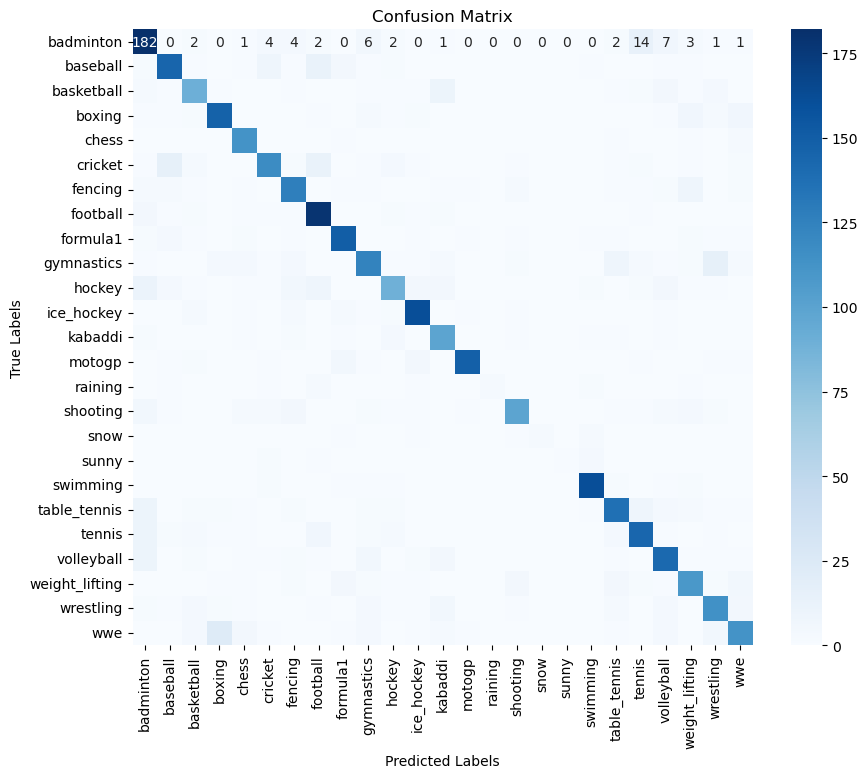

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


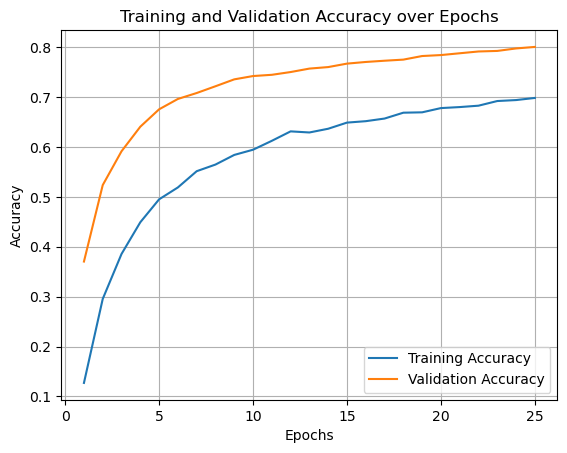

In [15]:
# Extract accuracy values
training_accuracy = History.history['accuracy']
validation_accuracy = History.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Create a line plot
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()